In [5]:
import csv
import os

with open(os.path.join('Table results single.csv'),'r') as File:
    reader = csv.reader(File, delimiter='\t', quotechar=',',
                        quoting=csv.QUOTE_MINIMAL)
    row = []
    for row_read in reader:
        row.append(row_read) # Store each row
        
row_clear = row[1:] # Clear header
row_csv = []

print(row_clear)

'\ncleanedResults = np.zeros((30,results.shape[1]))\nfor i in range(1,4):\n    cleanedResults[:,i] = results[~numpy.isnan(results[:,i]),i]\nprint(cleanedResults)\n'

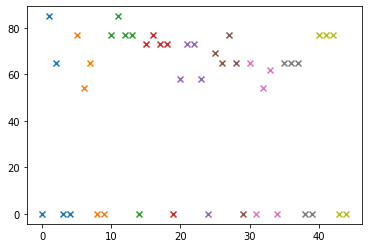

In [43]:
import numpy as np
import matplotlib.pyplot as plt

results = np.genfromtxt(os.path.join('Table results single.csv'),delimiter=';')
results = np.array(results,dtype='float') # Convert into array
results = np.nan_to_num(results)
# Single
single = results[2:,1:4]
#print(single)

# Multiview
#print(results[2:,4:8])

for i in range(9):
    plt.scatter(np.arange(i*5,(i+1)*5),single[i*5:(i+1)*5,0],marker='x')
    

'''
cleanedResults = np.zeros((30,results.shape[1]))
for i in range(1,4):
    cleanedResults[:,i] = results[~numpy.isnan(results[:,i]),i]
print(cleanedResults)
'''
